In [1]:
from tessellation import Tessellation
from poi_data import RoadData, POIdata
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sylt = Tessellation('Sylt')

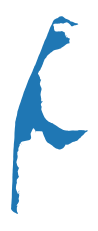

In [3]:
sylt_polygon = sylt.get_polygon()

sylt_polygon.plot().set_axis_off()

# Data Collection

In [4]:
POI_sylt = POIdata(sylt_polygon, ["amenity", "building"], 60, False).get_poi_data()
Road_sylt = RoadData(sylt_polygon).get_road_network()

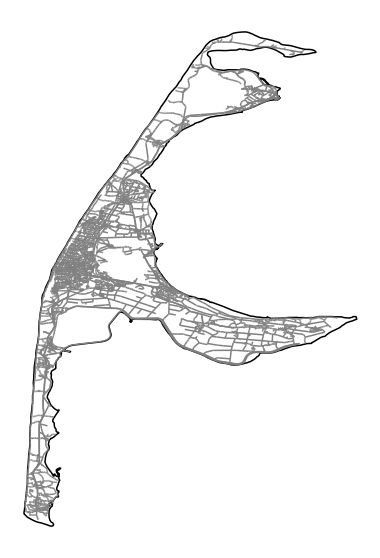

In [5]:
ax = sylt_polygon.boundary.plot(color='black', figsize=(8,10))
Road_sylt.plot(ax=ax, color='grey')
ax.set_axis_off()

# Squares and Hexagons

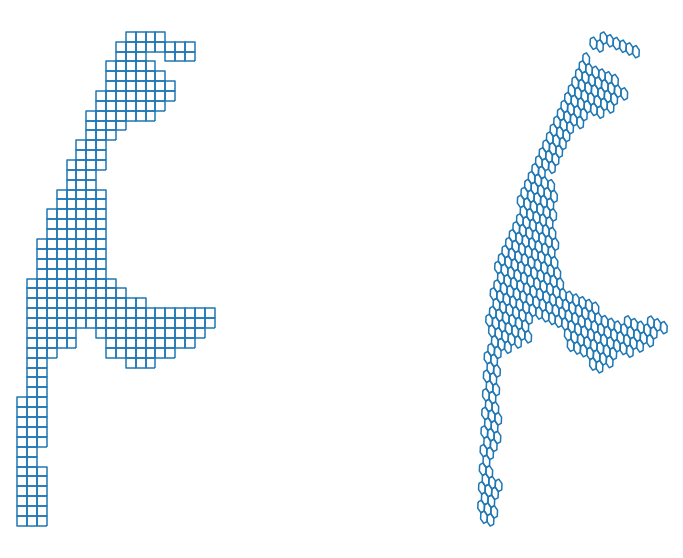

In [6]:
sylt_sq = sylt.squares(15)

sylt_hex = sylt.hexagons(8)

fig,axes = plt.subplots(1,2, figsize=(15,10))
sylt_sq.boundary.plot(ax=axes[0])
axes[0].set_axis_off()

sylt_hex.boundary.plot(ax=axes[1])
axes[1].set_axis_off()

# Adaptive Squares

In [7]:
sylt_asq = sylt.adaptive_squares(start_resolution=14, 
                                 poi_categories=["building"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

<AxesSubplot:>

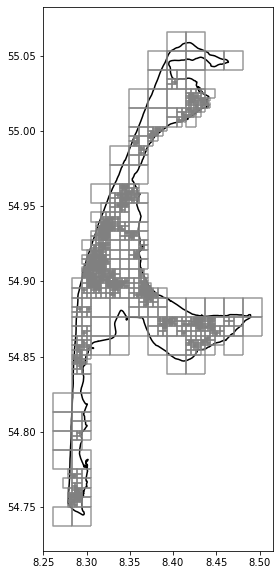

In [8]:
ax = sylt_polygon.boundary.plot(color='black', figsize=(8,10))
sylt_asq.boundary.plot(ax=ax, color="grey", alpha=0.8)

# Voronoi Polygons

In [9]:
sylt_kmeans = sylt.voronoi(cluster_algo="k-means",
                          poi_categories=["building"],
                          timeout=60,
                          n_polygons=len(sylt_sq),
                          verbose=False)

<AxesSubplot:>

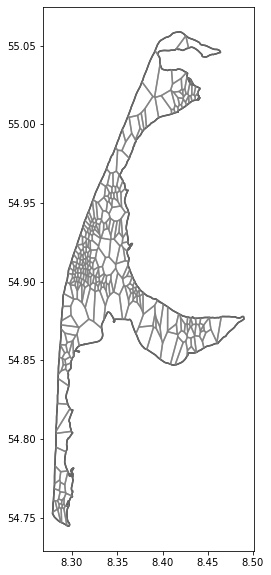

In [11]:
ax = sylt_polygon.boundary.plot(color='black', figsize=(8,10))
sylt_kmeans.boundary.plot(ax=ax, color="grey", alpha=0.8)

# city blocks

In [12]:
sylt_cb = sylt.city_blocks(number_of_LGUs=len(sylt_sq),
                          detail_deg=None,
                          split_roads=True,
                          verbose=False)

<AxesSubplot:>

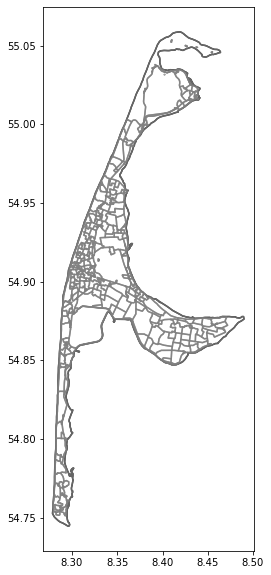

In [13]:
ax = sylt_polygon.boundary.plot(color='black', figsize=(8,10))
sylt_cb.boundary.plot(ax=ax, color="grey", alpha=0.8)

# American Island

In [15]:
key_west = Tessellation('Key West')

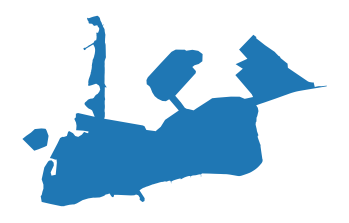

In [16]:
key_west_polygon = key_west.get_polygon()

key_west_polygon.plot().set_axis_off()

In [18]:
POI_kw = POIdata(key_west_polygon, ["amenity", "building"], 60, False).get_poi_data()
Road_kw = RoadData(key_west_polygon).get_road_network()